In [1]:
import sys
sys.path.append(r'../')
from hao.ViT import ViT
import hao.utils as u
from data.data_ISIC import ISICDataModule

In [2]:
img_size, patch_size, batch_size = 224, 16, 128
num_workers = 8
max_epochs = 15
use_bias = False
restart_train = True
gpu_idx = 0
num_hiddens, num_heads, num_blks = 768, 12, 4
mlp_num_hiddens = num_hiddens * 4
emb_dropout, blk_dropout, lr = 0.1, 0.1, 1e-4
last_model_path = r'ViT_pth/last_model.pth'
best_model_path = r'ViT_pth/best_model.pth'
image_dir=r"C:\Users\HaoXL\Music\ISIC\2018\Training_Data\ISIC2018_Task3_Training_Input"
label_file=r"C:\Users\HaoXL\Music\ISIC\2018\Training Ground Truth\ISIC2018_Task3_Training_GroundTruth\ISIC2018_Task3_Training_GroundTruth.csv"
categories = [
    'Melanoma',
    'Melanocytic Nevus',
    'Basal Cell Carcinoma',
    'Actinic Keratoses and Intraepithelial Carcinoma', 
    'Benign Keratosis',
    'Dermatofibroma',
    'Vascular Lesions'
]
texts = [f'a photo of skin lesions of {c}' for c in categories]
num_classes = len(categories)


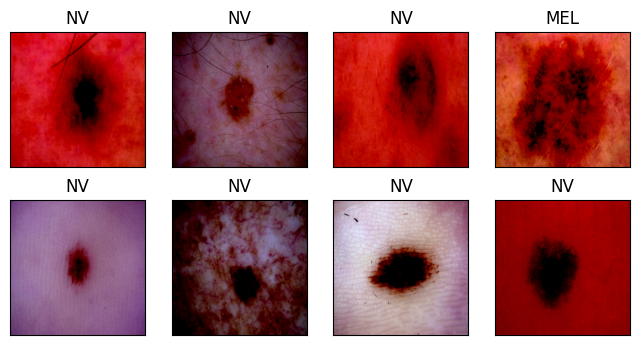

In [3]:
data = ISICDataModule(image_dir, label_file, batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

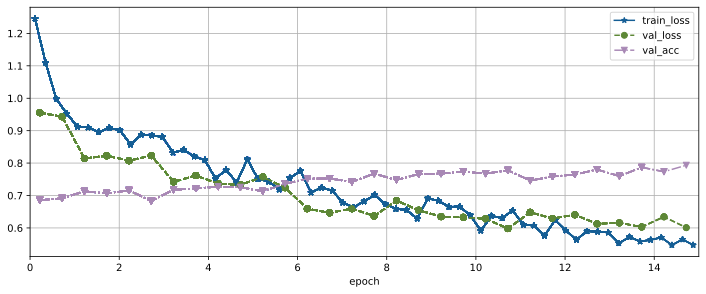

In [4]:
model = ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

In [5]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.0687 val loss 0.9493 val acc 68.85%
Epoch 2 : train loss 0.9081 val loss 0.8185 val acc 70.97%
Epoch 3 : train loss 0.8749 val loss 0.8153 val acc 69.94%
Epoch 4 : train loss 0.8355 val loss 0.7519 val acc 71.97%
Epoch 5 : train loss 0.7725 val loss 0.7348 val acc 72.66%
Epoch 6 : train loss 0.7461 val loss 0.7407 val acc 72.44%
Epoch 7 : train loss 0.7180 val loss 0.6530 val acc 75.23%
Epoch 8 : train loss 0.6861 val loss 0.6482 val acc 75.48%
Epoch 9 : train loss 0.6611 val loss 0.6694 val acc 75.72%
Epoch 10: train loss 0.6597 val loss 0.6339 val acc 77.06%
Epoch 11: train loss 0.6289 val loss 0.6132 val acc 77.26%
Epoch 12: train loss 0.6031 val loss 0.6386 val acc 75.23%
Epoch 13: train loss 0.5854 val loss 0.6267 val acc 77.24%
Epoch 14: train loss 0.5591 val loss 0.6094 val acc 77.33%
Epoch 15: train loss 0.5587 val loss 0.6176 val acc 78.34%
*Best epoch 15: train loss 0.5587 val loss 0.6176 val acc 78.34%
